Task 1

In [ ]:
#importing libraries
import numpy as np
import skimage.util 
import skimage
from skimage import filters
import cv2 as cv
from PIL import Image,ImageOps
from matplotlib.pyplot import imshow,title,figure
from matplotlib import pyplot as plt
import math
from scipy import ndimage, misc
import scipy
from skimage import io,color
from skimage.color import rgb2lab, lab2rgb
from skimage.filters import rank
from skimage.morphology import disk
from skimage.morphology import ball
%matplotlib inline

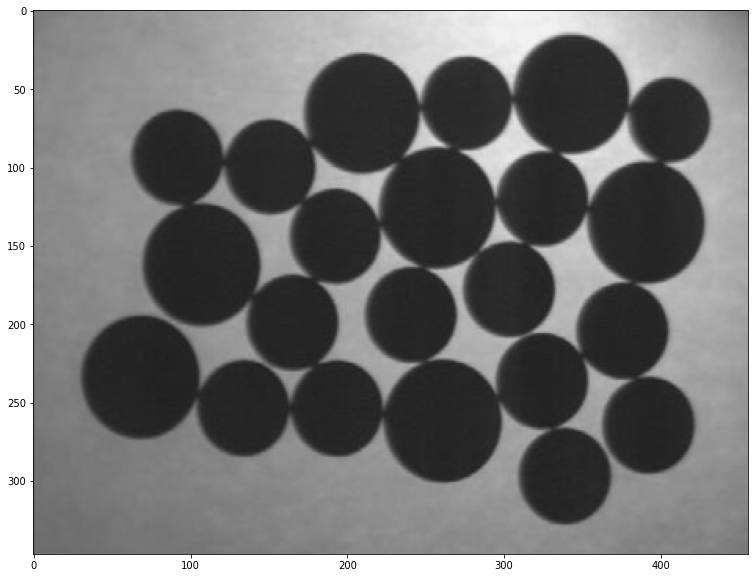

In [ ]:
#reading image
img = cv.imread('A1_1.png')
img_rgb = img[:,:,::-1]

#displaying image
figure(figsize = (15,10))
imshow(img_rgb)

In [ ]:
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

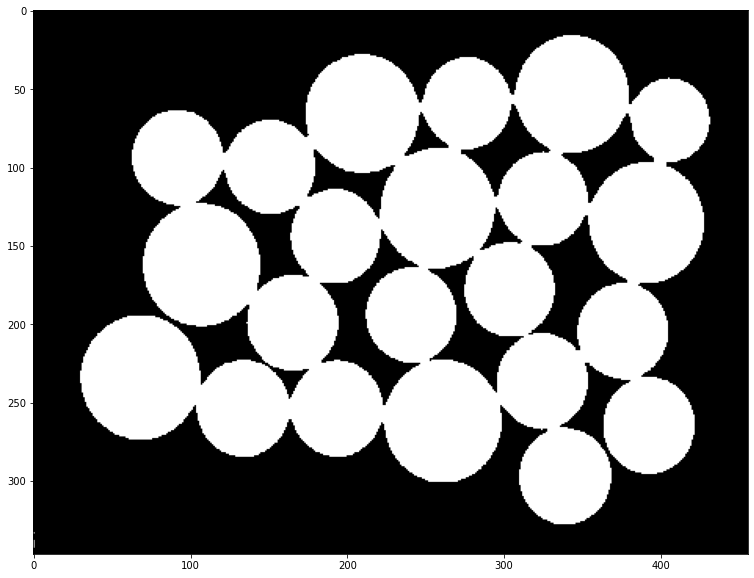

In [ ]:
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
figure(figsize = (15,10))
imshow(thresh,cmap='gray')

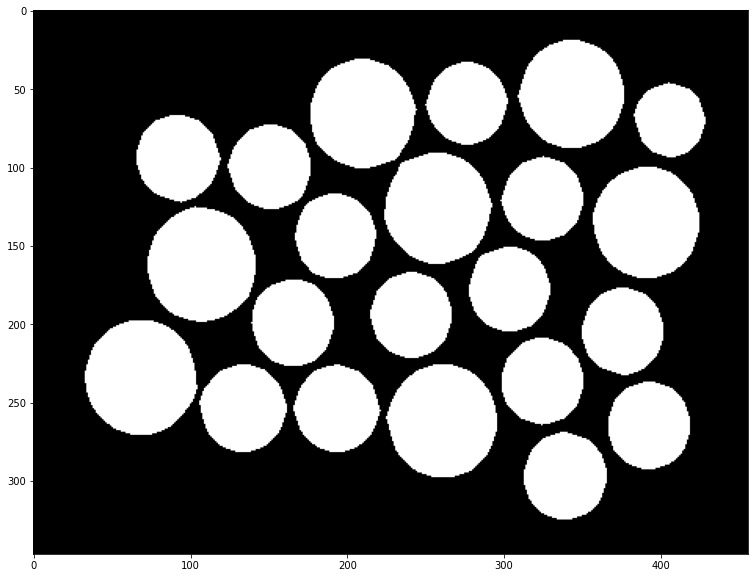

In [ ]:
mask = disk(5)
maskb = disk(3)
img_erosion = cv.erode(thresh, mask, iterations=3)
img_dil = cv.dilate(img_erosion, mask, iterations=2)
img_erosion = cv.erode(img_dil, maskb, iterations=1)
img_dil = cv.dilate(img_erosion, mask, iterations=1)
figure(figsize = (15,10))
imshow(img_dil,cmap='gray')

In [ ]:
num_labels, labels = cv.connectedComponents(img_dil)
print(f"Number of objects in image are {num_labels-1}")

Number of objects in image are 22


Task 2

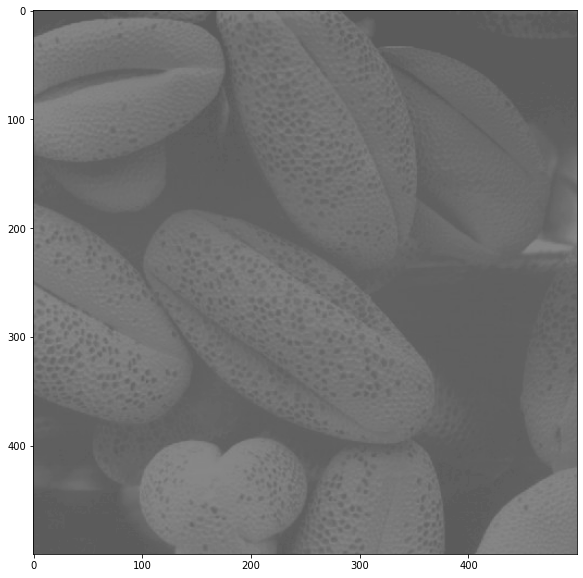

In [ ]:
#reading image
img = cv.imread('A2_1.tif')
img_rgb = img[:,:,::-1]

#displaying image
figure(figsize = (15,10))
imshow(img_rgb)

In [ ]:
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

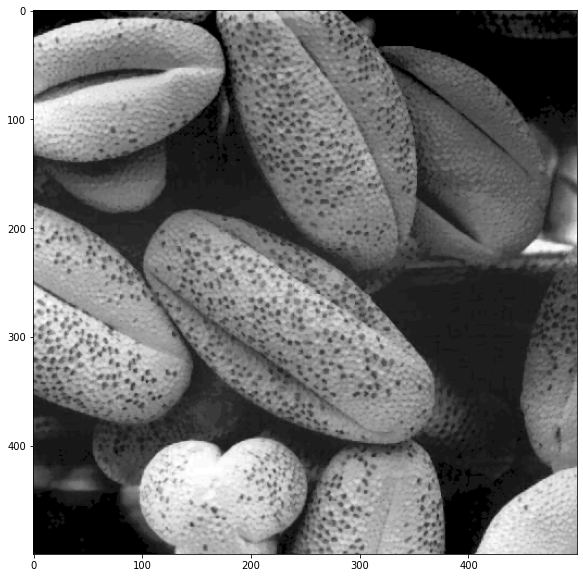

In [ ]:
mask = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]],dtype=np.uint8)
img_erosion = cv.erode(gray, mask, iterations=1)
img_dil = cv.dilate(img_erosion, mask, iterations=1)
figure(figsize = (15,10))
imshow(img_dil,cmap='gray')

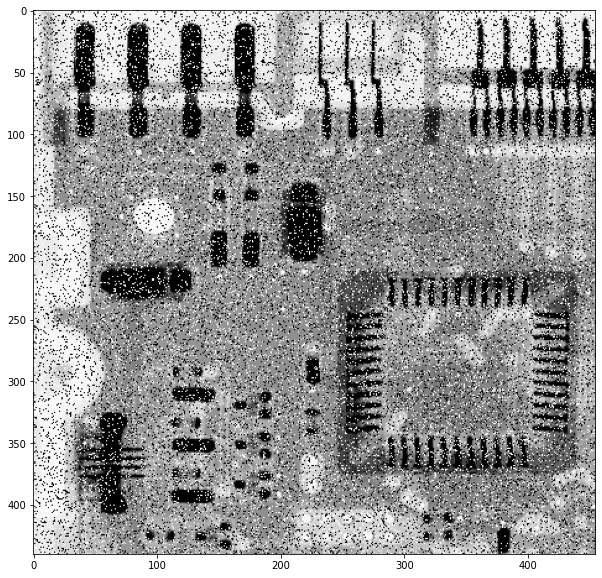

In [ ]:
#reading image
img = cv.imread('A2_2.tif')
img_rgb = img[:,:,::-1]

#displaying image
figure(figsize = (15,10))
imshow(img_rgb)

In [ ]:
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

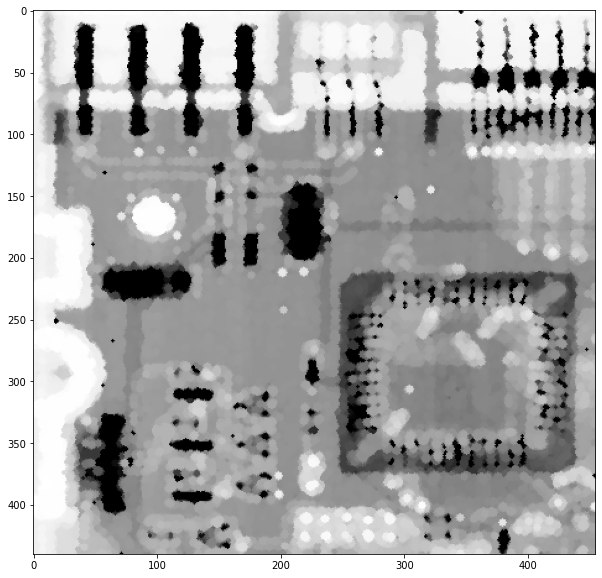

In [ ]:
mask = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]],dtype=np.uint8)
maskb = disk(4)
maskc = disk(1)
img_erosion = cv.erode(gray, mask, iterations=1)
img_dil = cv.dilate(img_erosion, maskb, iterations=1)
img_erosion = cv.erode(img_dil, maskc, iterations=1)
figure(figsize = (15,10))
imshow(img_erosion,cmap='gray')

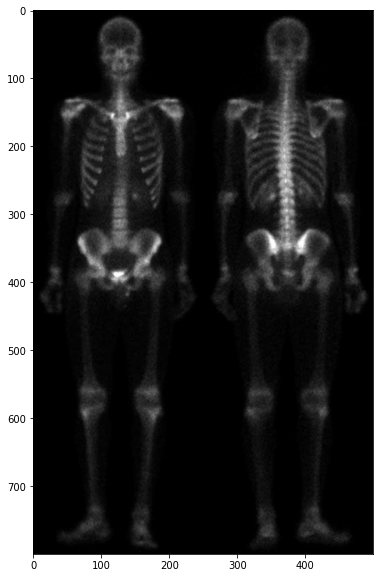

In [ ]:
#reading image
img = cv.imread('A2_3.tif')
img_rgb = img[:,:,::-1]

#displaying image
figure(figsize = (15,10))
imshow(img_rgb)

In [ ]:
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)

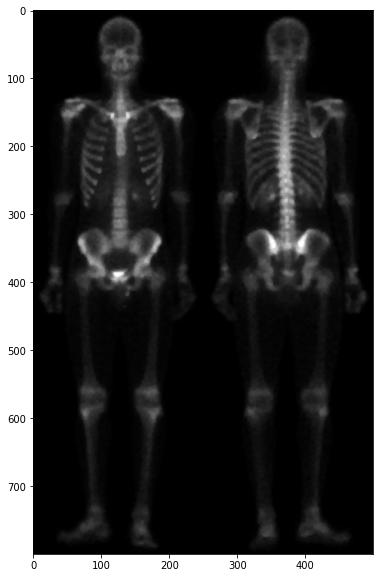

In [ ]:
maskb = disk(2)

img_erosion = cv.erode(gray, mask, iterations=1)
img_opening = cv.dilate(img_erosion, mask, iterations=1)
a = gray - img_opening

img_dilation = cv.dilate(gray, mask, iterations=1)
img_closing = cv.erode(img_dilation, mask, iterations=1)
b = img_closing - gray

final = gray + b - a
figure(figsize = (15,10))
imshow(final,cmap='gray')